In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
retail = pd.read_csv('retail_data.csv', encoding='cp1252')

In [5]:
retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Pincode,229.0,601742.572052,6573.378113,600001.00,600033.00,600059.00,600099.0000,635810.00
Q Val. (Rs. Lac),183.0,1.842459,2.595590,0.01,0.55,1.07,2.0000,25.00
Order Val. (Rs. Lac),48.0,1.874375,2.313372,0.07,0.53,1.15,1.6225,10.95
Order QTY,48.0,10.229167,14.925688,1.00,2.00,6.00,10.5000,73.00
Second Action-Call Status.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price Per Sft,229.0,1045.323144,220.032076,650.00,921.00,1030.00,1129.0000,3121.00
Aesthetics,37.0,0.243243,0.434959,0.00,0.00,0.00,0.0000,1.00
Reduce Street Noise,37.0,0.648649,0.483978,0.00,0.00,1.00,1.0000,1.00
Low Maintenance,37.0,0.486486,0.506712,0.00,0.00,0.00,1.0000,1.00
Monsoon Proof,37.0,0.081081,0.276725,0.00,0.00,0.00,0.0000,1.00


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

In [12]:
retail['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           14
Pearlson       9
pearlson       7
Name: Dealer Name, dtype: int64

In [13]:
retail['Dealer Name']=retail['Dealer Name'].replace('pearlson','Pearlson')

In [14]:
retail['Dealer Name'].value_counts()

Direct        63
Windoors      45
Sunbird       36
Winfratech    20
OXXO          20
Pearlson      16
Rajtechnis    15
ITP           14
Name: Dealer Name, dtype: int64

In [15]:
retail.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

## Exploratory Data Analysis

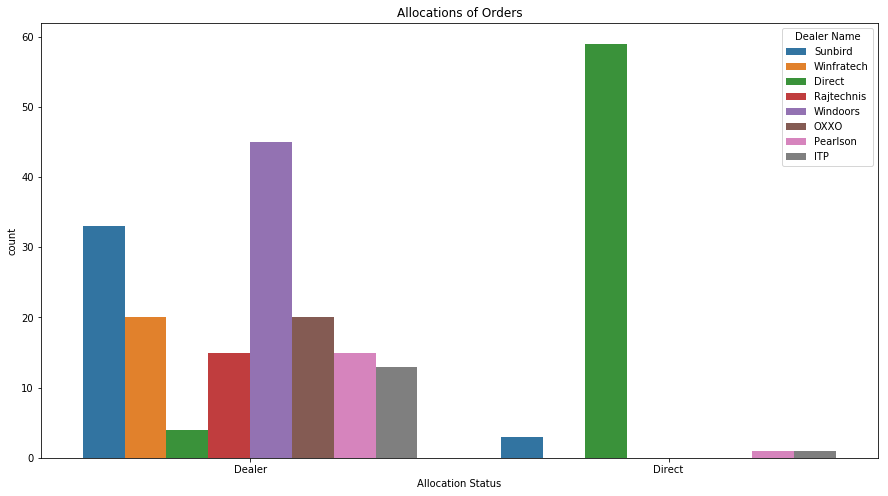

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(retail['Allocation Status'],hue='Dealer Name', data=retail)
plt.title('Allocations of Orders')
plt.show()

There are two ways of buying a window from a company- Dealer or Direct. As we can see that there are a lot of dealer buy in every dealer present in dealer block. The maximum allocation for dealer went to 'Windoors' followed by 'Sunbird'.

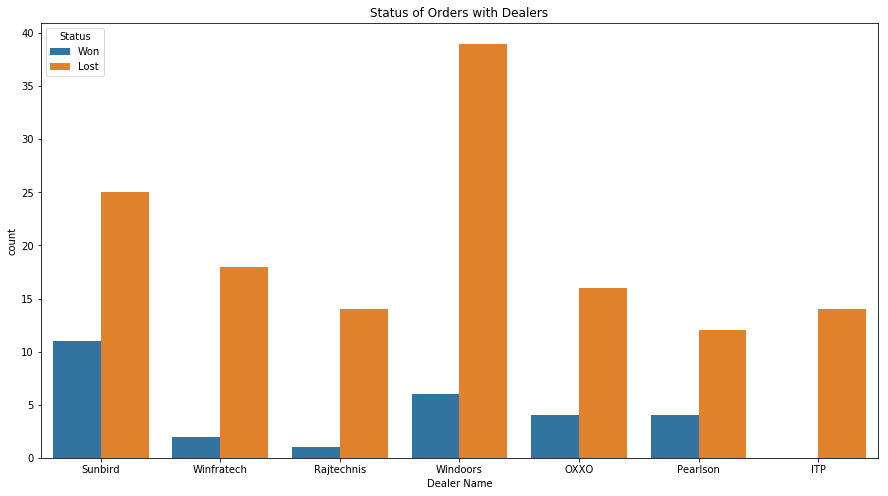

In [75]:
onlydealers = retail[retail['Dealer Name'] != 'Direct'] #we need to compare sales made by dealer so, we remove direct sales from the table
plt.figure(figsize=(15,8))
sns.countplot(x='Dealer Name', hue='Status', data=onlydealers)
plt.title('Status of Orders with Dealers')
plt.show()

In [32]:
temp=onlydealers.groupby(['Dealer Name','Status']).count()['Month']
temp

Dealer Name  Status
ITP          Lost      14
OXXO         Lost      16
             Won        4
Pearlson     Lost      12
             Won        4
Rajtechnis   Lost      14
             Won        1
Sunbird      Lost      25
             Won       11
Windoors     Lost      39
             Won        6
Winfratech   Lost      18
             Won        2
Name: Month, dtype: int64

The winning status for allocation of dealer is best for 'Sunbird'. Eventhough windoor has the maximum allocation, the conversion is very poor. ITP has not been able to conver single allocation.

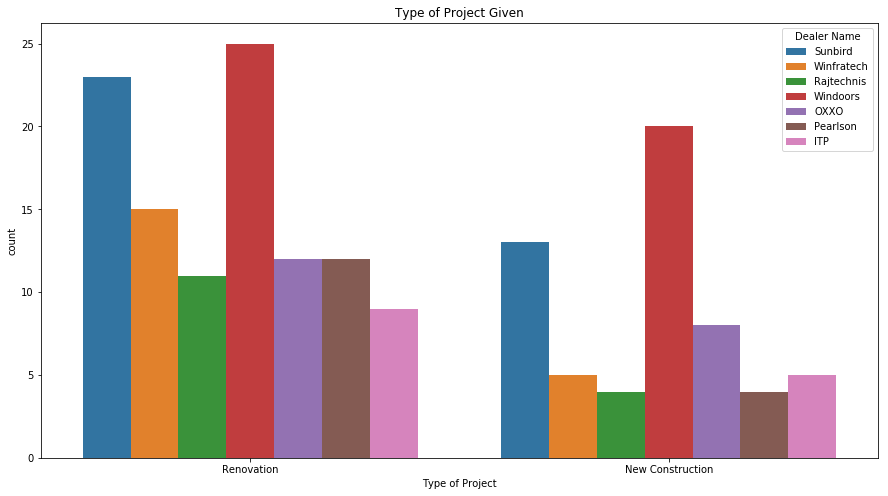

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(x='Type of Project', hue='Dealer Name', data=onlydealers)
plt.title('Type of Project Given')
plt.show()

There are two types of project- renovation and new construction. The project is assign to all the dealers with Windoor has the highest and ITP has lowest number of projects. However, Renovation minimum is ITP and New construction minimum is Rajtechnis

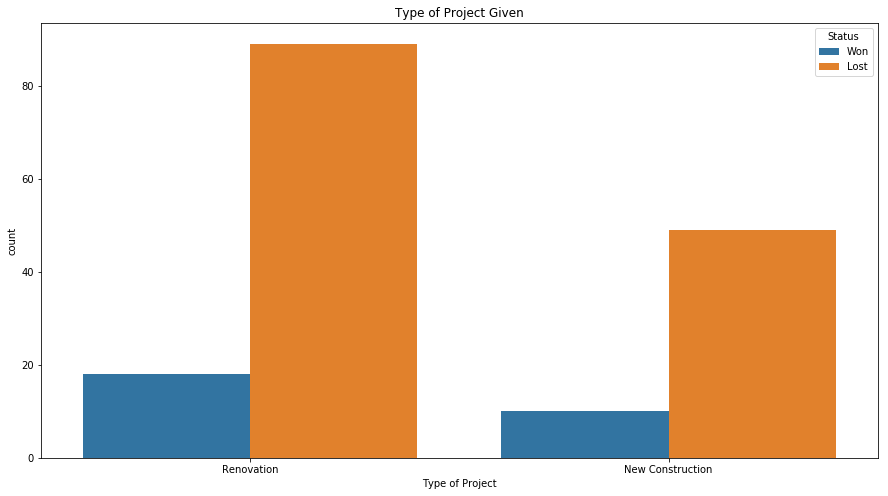

In [81]:
plt.figure(figsize=(15,8))
sns.countplot(x='Type of Project', hue='Status', data=onlydealers)
plt.title('Type of Project Given')
plt.show()

The success rate in both type of projects are low and similar

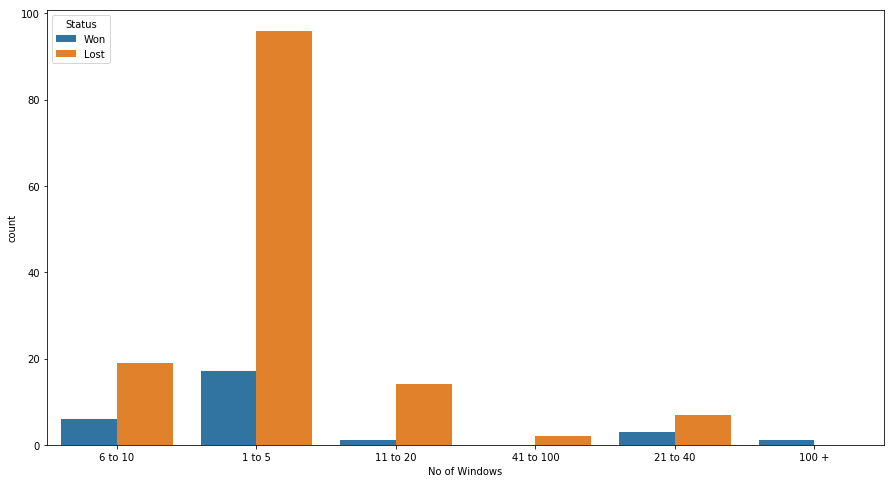

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x='No of Windows',hue='Status', data=onlydealers)
plt.show()

Majority of the order made is for the windows between 1 to 5 and also it has the hisghest success rate

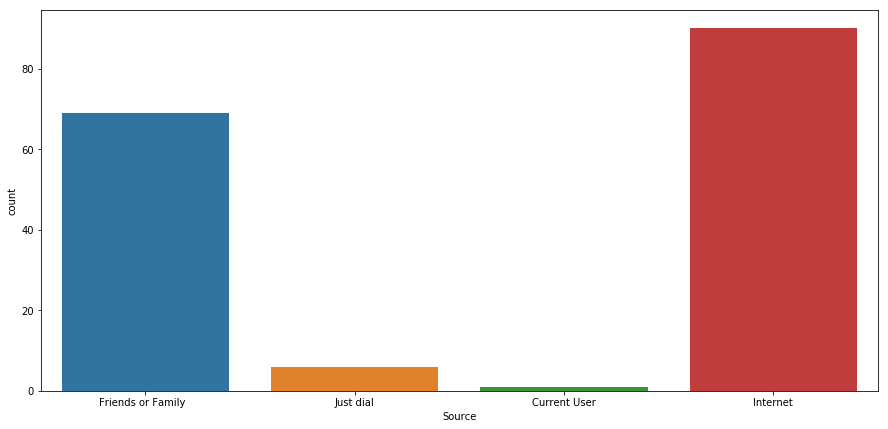

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x='Source', data=onlydealers)
plt.show()

A lot of a order made through internet, so for a company it is important to increase its presence online and inverst on online promotions

In [58]:
onlydealers['Third Action-Quote Given']=onlydealers['Third Action-Quote Given'].replace('YES','yes')
onlydealers['Second Action-Call Status'].fillna('Not Submitted',inplace=True)
onlydealers['Third Action-Quote Given'].fillna('no',inplace=True)
temp3=onlydealers.groupby(['Dealer Name', 'First Action-Call Status','Second Action-Call Status','Third Action-Quote Given',' Order Recd\Lost ']).count()['Month']

In [68]:
temp4=pd.DataFrame(temp3).reset_index()
temp4.columns = ['Dealer Name', 'First Action-Call Status', 'Second Action-Call Status',
       'Third Action-Quote Given', ' Order Recd\Lost ', 'Counts']
temp4

,Dealer Name,First Action-Call Status,Second Action-Call Status,Third Action-Quote Given,Order Recd\Lost,Counts
0,ITP,Appointment Fixed,Quote to Be Submitted,yes,Lost to UPVC (Provide details),8
1,ITP,Appointment Fixed,Quote to Be Submitted,yes,Lost to Wooden,1
2,ITP,Budget Constraint,Not Submitted,no,Lost to UPVC (Provide details),2
3,ITP,Design not Feasible,Not Submitted,no,Product Issue-Design/Type,3
4,OXXO,Appointment Fixed,Quote to Be Submitted,yes,Lost to Aluminum,2
5,OXXO,Appointment Fixed,Quote to Be Submitted,yes,Lost to UPVC (Provide details),5
6,OXXO,Appointment Fixed,Quote to Be Submitted,yes,Lost to Wooden,3
7,OXXO,Appointment Fixed,Quote to Be Submitted,yes,Order Received,4
8,OXXO,Appointment Fixed,Quote to Be Submitted,yes,Product Issue-Design/Type,5
9,OXXO,Budget Constraint,Not Submitted,no,Lost to UPVC (Provide details),1


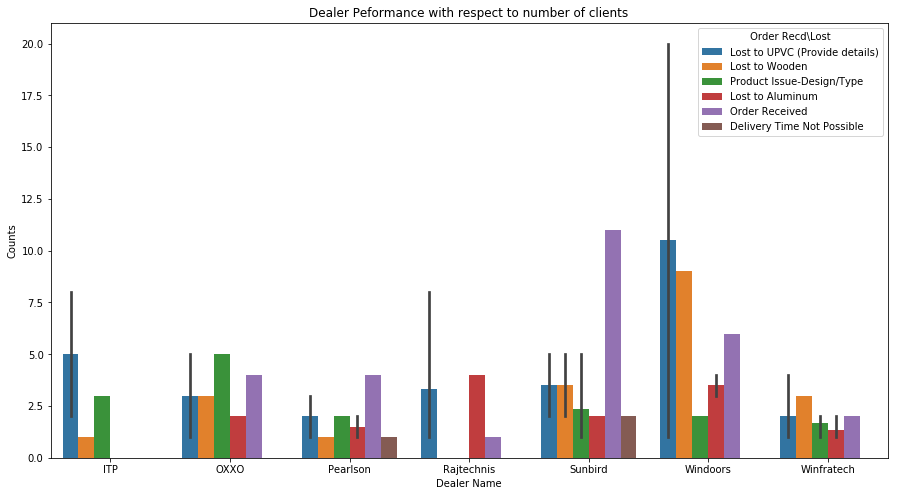

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(x='Dealer Name', y='Counts', hue=' Order Recd\Lost ', data=temp4)
plt.title('Dealer Peformance with respect to number of clients')
plt.show()

This graph represent each dealer and what is happening with the orders they received. Only purple line is showing the number of customers they are able to get the order others are the different reasons that dealer lost that client. 

Insight (in term of clients converted):

- ITP is not able to convert its single client and lost them to compeititor, company need to warn this dealer and help them realize the potential and why they are loosing
- OXXO has received number of orders but not able to convert most of them. It has lost their clients to competitor. Eventhough, this dealer was able to convert few of the clients, the ratio of success to fail is still very low
- Pearlson has lost clients due to all the reasons stated on the board. This dealer is showing potential but still the number lost is far more than success
- Rajtechnis is either losing the customer to UPVC oor to aluminium. We need to find out the problem this dealer is facing towards making this sale. 
- Sunbird has the highest sucess rate out of all the dealers in term of number of clients converted. 
- Windoor has been alloted a highest number of customers but loosing a lot in comparision to others
- Winfratech has low allocation and low conversion.

In [83]:
onlydealers['sales'] = onlydealers['Order Val. (Rs. Lac)'] * onlydealers['Order QTY']

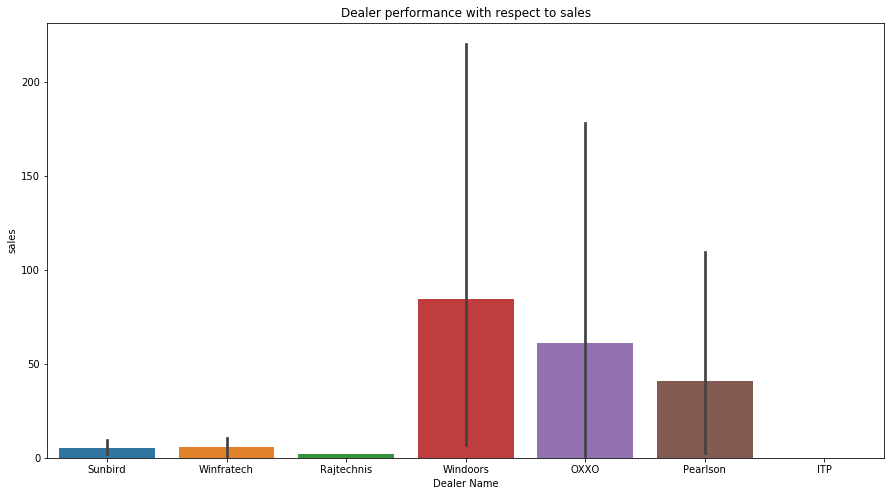

In [91]:
plt.figure(figsize=(15,8))
sns.barplot(x='Dealer Name', y='sales', data=onlydealers)
plt.title('Dealer performance with respect to sales')
plt.show()

This graph represent the sales made by each dealers in lacs. 

Insight (on the basis of sales):

- Windoor is providing the highest number of sales followed by OXXO and Pearlson
- Eventhough Windoor has lost many clients but the retained clients has high value transaction, same thing apply for OXXO and Pealson
- Sunbird has the highest success rate in conversion of clients but most of them are small value client

In [122]:
temp6 = temp4[temp4[' Order Recd\Lost '] == 'Order Received'].loc[:,['Dealer Name','Counts']]
temp6.columns = ['Dealer Name', 'Converted']
temp6

,Dealer Name,Converted
7,OXXO,4
12,Pearlson,4
21,Rajtechnis,1
29,Sunbird,11
37,Windoors,6
46,Winfratech,2


In [125]:
onlydealers.sales.fillna(0, inplace=True)
temp5=onlydealers.groupby('Dealer Name').agg(['sum','count'])['sales'].reset_index()
temp5['sales per client'] = temp5['sum']/temp5['count']
temp5=temp5.sort_values('sales per client', ascending=False)
temp5

,Dealer Name,sum,count,sales per client
1,OXXO,243.64,20,12.182000
2,Pearlson,162.47,16,10.154375
5,Windoors,337.57,45,7.501556
4,Sunbird,53.05,36,1.473611
6,Winfratech,11.11,20,0.555500
3,Rajtechnis,2.12,15,0.141333
0,ITP,0.00,14,0.000000


In [137]:
temp7=temp5.merge(temp6, on='Dealer Name', how='outer')
temp7.Converted.fillna(0, inplace=True)
temp7['conversion_rate'] = temp7['Converted']/ temp7['count']
temp7[['Dealer Name','sum','count','Converted', 'conversion_rate','sales per client']]

,Dealer Name,sum,count,Converted,conversion_rate,sales per client
0,OXXO,243.64,20,4.0,0.200000,12.182000
1,Pearlson,162.47,16,4.0,0.250000,10.154375
2,Windoors,337.57,45,6.0,0.133333,7.501556
3,Sunbird,53.05,36,11.0,0.305556,1.473611
4,Winfratech,11.11,20,2.0,0.100000,0.555500
5,Rajtechnis,2.12,15,1.0,0.066667,0.141333
6,ITP,0.00,14,0.0,0.000000,0.000000


This table is stating the sales per number of client allocated to that dealer. This table is giving the outlook of each dealer with respect to sale made and clients served. Insight

- Maximum value of sales - Windoors 337.57 lacs
- Highest client conversion - Sunbird 30%
- Highest sales per client provided - OXXO 12.18 lacs
- ITP is not able to convert single client so it is lowest in all category

The End